# Face detection using-FaceNet
 The problem is to recognize the faces given in the images.Here i am having the dataset  the images of arount 17-18 for each
 face we want to detect.The order of the directory must be in the same sequence as given in the readme file.The Multi-task    Cascade Convolutional Neural Network (MTCNN) is used to crop the faces from the images.The face embedding of the croped faces is than find out by the FaceNet model of the google. The embeddings are than classify by the SVM classifier to classify the images.
 The FaceNet model can be found out here: https://drive.google.com/open?id=1Iz0xGKelA0pB-y3v-PrY-HtHjPP0xQxb

In [3]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 2.8MB/s 
  Created wheel for mtcnn: filename=mtcnn-0.0.9-cp36-none-any.whl size=2257690 sha256=4db1232d6a26c7936e4fb2e8c811c3b3aabdb051a5bc8358db9df1ecc9c2da08
  Stored in directory: /root/.cache/pip/wheels/85/81/65/6363fa5aafd7a155c896591e0c7c6e27b69642aa82b9cbf076
Successfully built mtcnn


In [6]:
# face detection for the bollywood Celebrity Faces of custom Dataset
from os import listdir
from os.path import isdir
from PIL import Image
from matplotlib import pyplot
from numpy import savez_compressed
from numpy import asarray
from mtcnn.mtcnn import MTCNN

# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
	# load image from file
	image = Image.open(filename)
	# convert to RGB, if needed
	image = image.convert('RGB')
	# convert to array
	pixels = asarray(image)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	# bug fix
	x1, y1 = abs(x1), abs(y1)
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

# load images and extract faces for all images in a directory
def load_faces_images(directory):
	faces = list()
	# enumerate files
	for filename in listdir(directory):
		# path
		path = directory + filename
		# get face
		face = extract_face(path)
		# store
		faces.append(face)
	return faces

# load a dataset that contains one subdir for each class that in turn contains images
def load_dataset_train_test(directory):
	X, y = list(), list()
	# enumerate folders, on per class
	for subdir in listdir(directory):
		# path
		path = directory + subdir + '/'
		# skip any files that might be in the dir
		if not isdir(path):
			continue
		# load all faces in the subdirectory
		faces = load_faces_images(path)
		# create labels
		labels = [subdir for _ in range(len(faces))]
		# summarize progress
		print('>>>loaded {} examples for class: {}' .format(len(faces), subdir))
		# store
		X.extend(faces)
		y.extend(labels)
	return asarray(X), asarray(y)

# load train dataset
trainX, trainy = load_dataset_train_test('/content/drive/My Drive/Facial-Recognition-using-Facenet/dataset/train/')
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset_train_test('/content/drive/My Drive/Facial-Recognition-using-Facenet/dataset/val/')
# 0save arrays to one file in compressed format
savez_compressed('bollywood-celebrity-faces-embeddings.npz', trainX, trainy, testX, testy)







Instructions for updating:
Deprecated in favor of operator or tf.math.divide.

>>>loaded 17 examples for class: vinod_khanna
>>>loaded 17 examples for class: sara_banu
>>>loaded 18 examples for class: salakshana_pandit
>>>loaded 1 examples for class: amitabh_bacchan
(53, 160, 160, 3) (53,)
>>>loaded 4 examples for class: vinod_khanna
>>>loaded 4 examples for class: amitabh_bacchan
>>>loaded 4 examples for class: sara_banu
>>>loaded 4 examples for class: salakshana_pandit


# Finding the embeddings
the embeddings of the arrays we found are than calculeted here by the facenet models the model must be loaded
first to the working directory.the embeddings which we saved along with labels in the formate of.pz is loaded her
so that must be present in the working directory as well.


In [7]:
# calculate a face embedding for each face in the dataset using facenet
from numpy import load
from numpy import expand_dims
from numpy import asarray
from numpy import savez_compressed
from keras.models import load_model

# get the face embedding for one face
def get_embedding(model, face_pixels):
	# scale pixel values
	face_pixels = face_pixels.astype('float32')
	# standardize pixel values across channels (global)
	mean, std = face_pixels.mean(), face_pixels.std()
	face_pixels = (face_pixels - mean) / std
	# transform face into one sample
	samples = expand_dims(face_pixels, axis=0)
	# make prediction to get embedding
	yhat = model.predict(samples)
	return yhat[0]

# load the face dataset
data = load('/content/drive/My Drive/Facial-Recognition-using-Facenet/bollywood-celebrity-faces-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)
# load the facenet model
model = load_model('facenet_keras.h5')
print('Loaded Model')
# convert each face in the train set to an embedding
newTrainX = list()
for face_pixels in trainX:
	embedding = get_embedding(model, face_pixels)
	newTrainX.append(embedding)
newTrainX = asarray(newTrainX)
print(newTrainX.shape)
# convert each face in the test set to an embedding
newTestX = list()
for face_pixels in testX:
	embedding = get_embedding(model, face_pixels)
	newTestX.append(embedding)
newTestX = asarray(newTestX)
print(newTestX.shape)
# save arrays to one file in compressed format
savez_compressed('bollywood-celebrity-faces-embeddings.npz', newTrainX, trainy, newTestX, testy)

Using TensorFlow backend.


Loaded:  (53, 160, 160, 3) (53,) (16, 160, 160, 3) (16,)








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Loaded Model
(53, 128)
(16, 128)


# Training the embeddings
on the SVM classifier we are going to train our embeddings we get above.than on passing the image to the model we could ge the
prediction of the model.

Predicted: vinod_khanna (86.629)
Expected: vinod_khanna


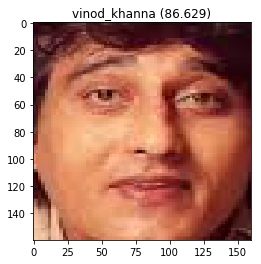

In [13]:
# develop a classifier for the bollywood Celebrity Faces Dataset
from random import choice
from numpy import load
from numpy import expand_dims
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from matplotlib import pyplot
# load faces
data = load('/content/drive/My Drive/Facial-Recognition-using-Facenet/5-celebrity-faces-dataset.npz')
testX_faces = data['arr_2']
# load face embeddings we calculated from get_embeddings
data = load('/content/drive/My Drive/Facial-Recognition-using-Facenet/bollywood-celebrity-faces-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)
# test model on a random example from the test dataset
selection = choice([i for i in range(testX.shape[0])])
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])
# prediction for the face
samples = expand_dims(random_face_emb, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])
# plot for fun
pyplot.imshow(random_face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
pyplot.title(title)
pyplot.show()